# Analysis Document

## Intro

This notebook is used to do analysis on the scraped quotes data in this repository. There will be x types of analysis to gain insights from them.

1. Frequency Analysis: Count frequent authors, words, and tags.

2. Sentiment Analysis: Determine positive, negative, or neutral sentiments in quotes.

3. Text Length Analysis: Analyze quote lengths (average, longest, shortest).

4. Author Insights: Analyze authors' diversity in topics, sentiment trends, or common themes.

5. Relationship Between Tags: Analyze co-occurrence of tags and visualize relationships.

6. Clustering and Grouping: Group similar quotes based on content or sentiment.

In each analysis, there will be visual summaries to give better interpretation of the results, such as bar charts, word clouds, etc.

## 1. Frequency Analysis

In [3]:
# Import necessary libraries
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS

In [4]:
# Load the scraped data into a dataframe
data = pd.read_csv('quotes.csv')

In [5]:
data.head()

,quote,author,tags,quote_cleaned
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",The world as we have created it is a process o...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",It is our choices Harry that show what we trul...
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",There are only two ways to live your life One ...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",The person be it gentleman or lady who has not...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",Imperfection is beauty madness is genius and i...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   quote          100 non-null    object
 1   author         100 non-null    object
 2   tags           97 non-null     object
 3   quote_cleaned  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [7]:
data.describe()

,quote,author,tags,quote_cleaned
count,100,100,97,100
unique,100,50,83,100
top,“The world as we have created it is a process ...,Albert Einstein,love,The world as we have created it is a process o...
freq,1,10,4,1


### 1.1. Count Frequent Authors

In [8]:
author_counts = data['author'].value_counts()
print("Top Authors:")
print(author_counts.head(10))

Top Authors:
author
Albert Einstein      10
J.K. Rowling          9
Marilyn Monroe        7
Dr. Seuss             6
Mark Twain            6
C.S. Lewis            5
Jane Austen           5
Bob Marley            3
Eleanor Roosevelt     2
Charles Bukowski      2
Name: count, dtype: int64


### 1.2. Count Frequent Words in Quotes

In [9]:
# Combine all quotes into a single string
all_quotes = " ".join(data['quote_cleaned'])

# Remove stop words and split into individual words
stop_words = set(STOPWORDS)
words = [word.lower() for word in all_quotes.split() if word.lower() not in stop_words]

# Count word occurrences
word_counts = Counter(words)
print("Most Common Words:")
print(word_counts.most_common(10))

Most Common Words:
[('love', 23), ('will', 18), ('one', 15), ('never', 13), ('think', 12), ('life', 11), ('make', 10), ('good', 8), ('live', 7), ('know', 7)]


### 1.3. Count Frequent Tags

In [10]:
# Split tags by delimiter ", " and flatten the list
all_tags = [tag for tags in data['tags'].dropna() for tag in tags.split(", ")]
tag_counts = Counter(all_tags)
print("Most Common Tags:")
print(tag_counts.most_common(10))

Most Common Tags:
[('love', 14), ('inspirational', 13), ('life', 13), ('humor', 12), ('books', 11), ('reading', 7), ('friendship', 5), ('friends', 4), ('truth', 4), ('simile', 3)]


### 1.4 Viz - Authors

In [11]:
import matplotlib.pyplot as plt

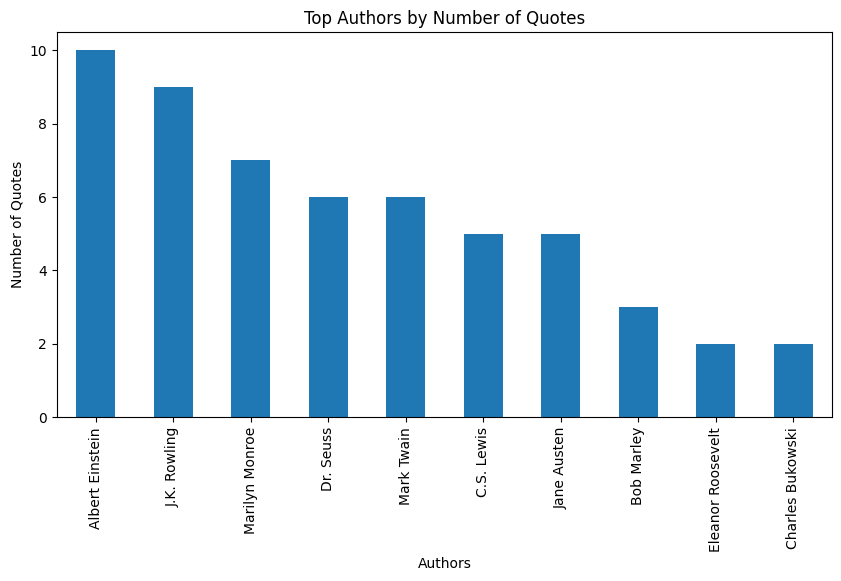

In [12]:
author_counts.head(10).plot(kind='bar', figsize=(10, 5))
plt.title("Top Authors by Number of Quotes")
plt.xlabel("Authors")
plt.ylabel("Number of Quotes")
plt.show()

### 1.5 Viz - Words

In [13]:
from wordcloud import WordCloud

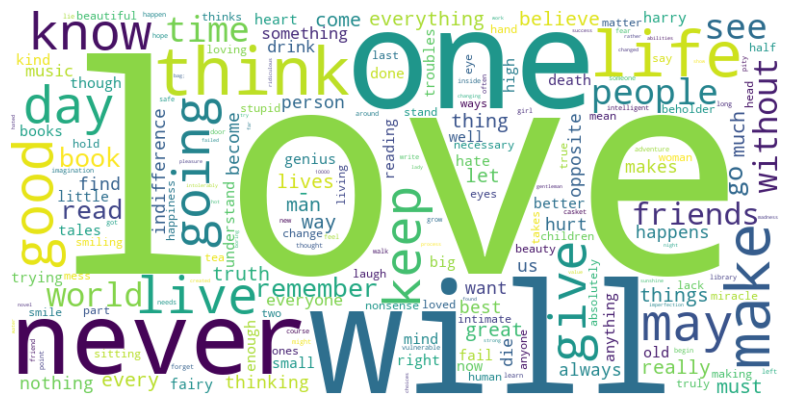

In [14]:
# Wordcloud of Frequent Words
wordcloud_words = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.axis("off")
plt.show()

### 1.6. Viz - Tags

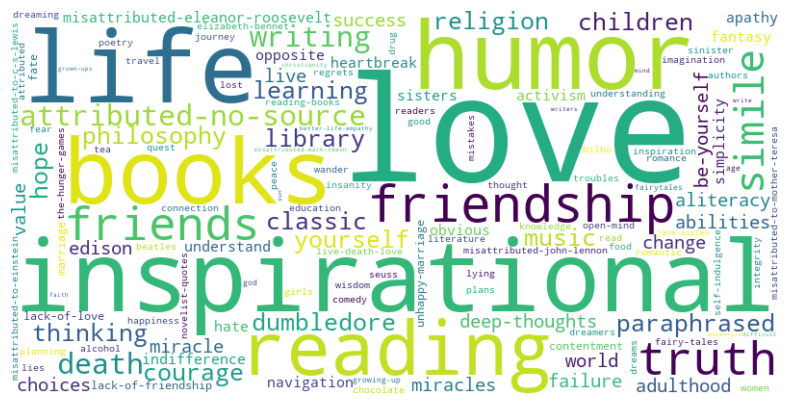

In [15]:
# Wordcloud of Frequent Tags
wordcloud_tags = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_tags, interpolation='bilinear')
plt.axis("off")
plt.show()